<center><h1>Ma_Htet_HW5</h1></center>
<br>
<br>

Name: Htet Ma
<br>
Github Username: hswma
<br>
USC ID: 4522446617

## 1. Decision Trees as Interpretable Models

Import packages

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_squared_error

os.chdir('../data')

### (a) Obtain Data

Get the Accute Inamations Data Set

In [2]:
df_diagnosis = pd.read_table('diagnosis.csv', encoding='utf-16', header=None)
df_diagnosis.columns = ['Temp', 'Nausea', 'L_pain', 'Pushing', 'M_pain', 'Burning', 'Inflame', 'Nephristis']
df_diagnosis = df_diagnosis.replace(',', '.', regex=True)
df_diagnosis = df_diagnosis.replace('no', 0, regex=True)
df_diagnosis = df_diagnosis.replace('yes', 1, regex=True)
df_xdiagnosis = df_diagnosis.iloc[:,0:6]
df_ydiagnosis = df_diagnosis.iloc[:,6:]

### (b) Build a decision tree

[Text(0.4, 0.9, 'x[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'x[3] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.6, 0.7, 'x[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'x[1] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'x[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

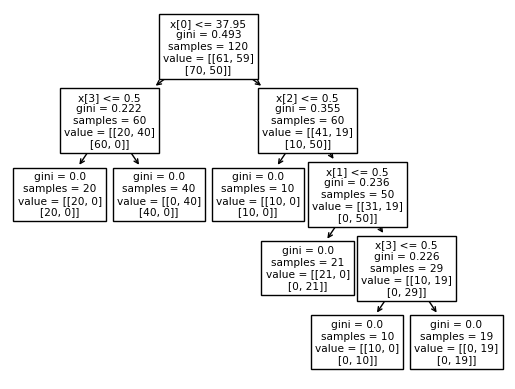

In [3]:
dt_1b = tree.DecisionTreeClassifier()
dt_1b.fit(df_xdiagnosis, df_ydiagnosis)
tree.plot_tree(dt_1b)

### (c) Convert the decision rules

In [4]:
from sklearn.tree import _tree
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature]
    print("def tree({}):".format(", ".join(feature_names)))
    def recurse(node, depth):
        indent = " " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else: # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))
    recurse(0, 1)
tree_to_code(dt_1b, list(df_xdiagnosis.columns))

def tree(Temp, Nausea, L_pain, Pushing, M_pain, Burning):
 if Temp <= 37.95000076293945:
  if Pushing <= 0.5:
   return [[20.  0.]
 [20.  0.]]
  else: # if Pushing > 0.5
   return [[ 0. 40.]
 [40.  0.]]
 else: # if Temp > 37.95000076293945
  if L_pain <= 0.5:
   return [[10.  0.]
 [10.  0.]]
  else: # if L_pain > 0.5
   if Nausea <= 0.5:
    return [[21.  0.]
 [ 0. 21.]]
   else: # if Nausea > 0.5
    if Pushing <= 0.5:
     return [[10.  0.]
 [ 0. 10.]]
    else: # if Pushing > 0.5
     return [[ 0. 19.]
 [ 0. 19.]]


### (d) Minimal decision tree

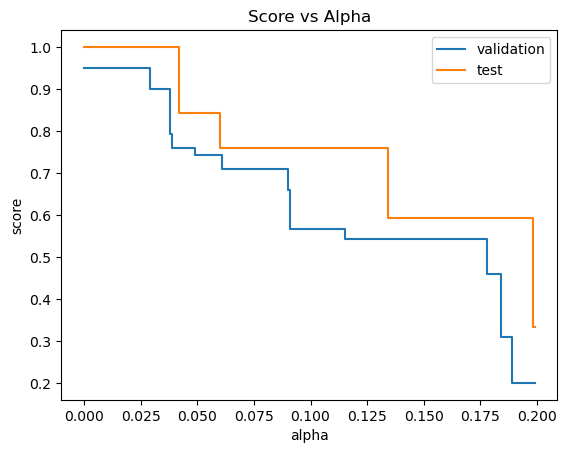

def tree(Temp, Nausea, L_pain, Pushing, M_pain, Burning):
 if Temp <= 37.95000076293945:
  if Pushing <= 0.5:
   return [[20.  0.]
 [20.  0.]]
  else: # if Pushing > 0.5
   return [[ 0. 40.]
 [40.  0.]]
 else: # if Temp > 37.95000076293945
  if L_pain <= 0.5:
   return [[10.  0.]
 [10.  0.]]
  else: # if L_pain > 0.5
   if Nausea <= 0.5:
    return [[21.  0.]
 [ 0. 21.]]
   else: # if Nausea > 0.5
    if Pushing <= 0.5:
     return [[10.  0.]
 [ 0. 10.]]
    else: # if Pushing > 0.5
     return [[ 0. 19.]
 [ 0. 19.]]


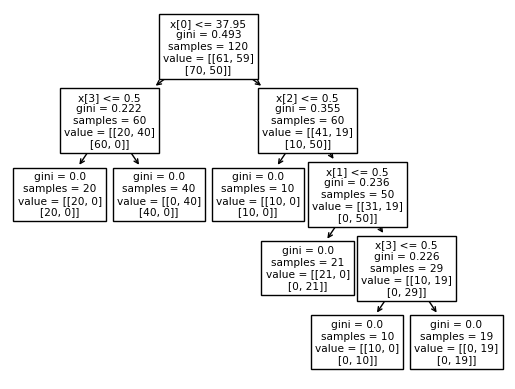

In [5]:
from sklearn.model_selection import cross_val_score

ccp_alphas=np.arange(0,0.2,0.001)
cv_scores_1d = []
test_scores_1d = []
for alpha in ccp_alphas:
    dt_1d = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    scores = cross_val_score(dt_1d, df_xdiagnosis, df_ydiagnosis, cv=5)
    dt_1d.fit(df_xdiagnosis.iloc[:-20], df_ydiagnosis.iloc[:-20])
    cv_scores_1d.append(scores.mean())
    test_scores_1d.append(dt_1d.score(df_xdiagnosis, df_ydiagnosis))

optimal_alpha = ccp_alphas[np.argmax(cv_scores_1d)]
plt.plot(ccp_alphas, cv_scores_1d, drawstyle="steps-post", label='validation')
plt.plot(ccp_alphas, test_scores_1d, drawstyle="steps-post", label='test')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('score')
plt.title('Score vs Alpha')
plt.show()

dt_1d = tree.DecisionTreeClassifier(ccp_alpha=optimal_alpha)
dt_1d.fit(df_xdiagnosis, df_ydiagnosis)
tree.plot_tree(dt_1d)

tree_to_code(dt_1d, list(df_xdiagnosis.columns))

## 2. The LASSO and Boosting for Regression

### (a) Obtain Data

In [6]:
df_all = pd.read_csv('communities.csv', header=None)
df_all = df_all.replace('?', float('nan'))
df_train = df_all.iloc[0:1495,:]
df_test = df_all.iloc[1495:,:]

### (b) Missing values

In [7]:
from sklearn.impute import SimpleImputer
df_trainpred = df_train.iloc[:,5:]
df_testpred = df_test.iloc[:,5:]
imputer = SimpleImputer(strategy='mean')
train_2b = imputer.fit_transform(df_trainpred)
train_2b = pd.DataFrame(train_2b)
test_2b = imputer.transform(df_testpred)
test_2b = pd.DataFrame(test_2b)

### (c) Plot a correlation matrix

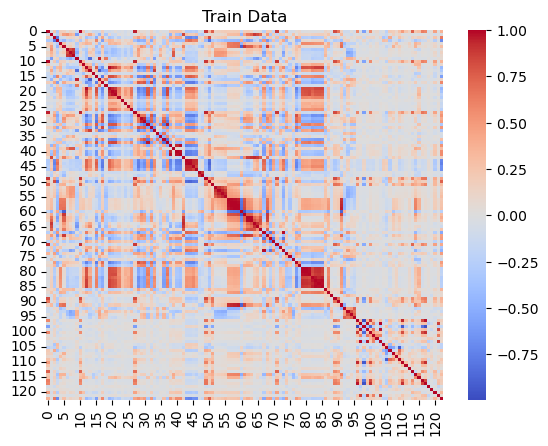

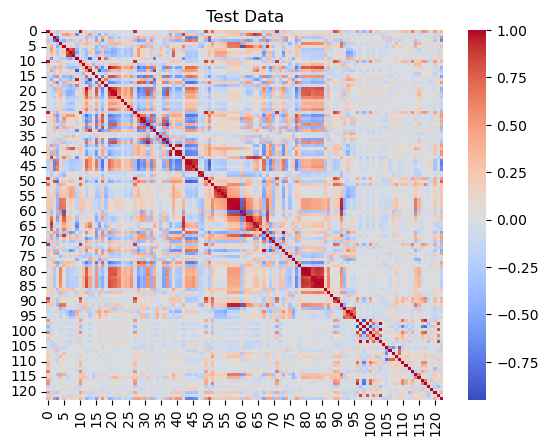

In [8]:
train_corr_2c = train_2b.corr()
plt.figure()
sns.heatmap(train_corr_2c, cmap='coolwarm')
plt.title('Train Data')
plt.show()
test_corr_2c = test_2b.corr()
plt.figure()
sns.heatmap(test_corr_2c, cmap='coolwarm')
plt.title('Test Data')
plt.show()

### (d) Calculate the Coefficient of Variation CV

In [9]:
cv_train = train_2b.std()/ train_2b.mean()
cv_test = test_2b.std()/ test_2b.mean()
print('Coefficient of variation for training data', cv_train)
print('Coefficient of variation for test data', cv_test)

Coefficient of variation for training data 0      2.241105
1      0.355800
2      1.428885
3      0.330213
4      1.359100
         ...   
118    0.115739
119    0.362989
120    2.552946
121    0.326026
122    0.987909
Length: 123, dtype: float64
Coefficient of variation for test data 0      2.077145
1      0.346017
2      1.356525
3      0.304182
4      1.360714
         ...   
118    0.133616
119    0.351878
120    2.563248
121    0.391046
122    0.948676
Length: 123, dtype: float64


### (e) Scatter plots and box plots for highest CV features

The highest coefficient of variation between the train and test data sets are the same.


<Figure size 640x480 with 0 Axes>

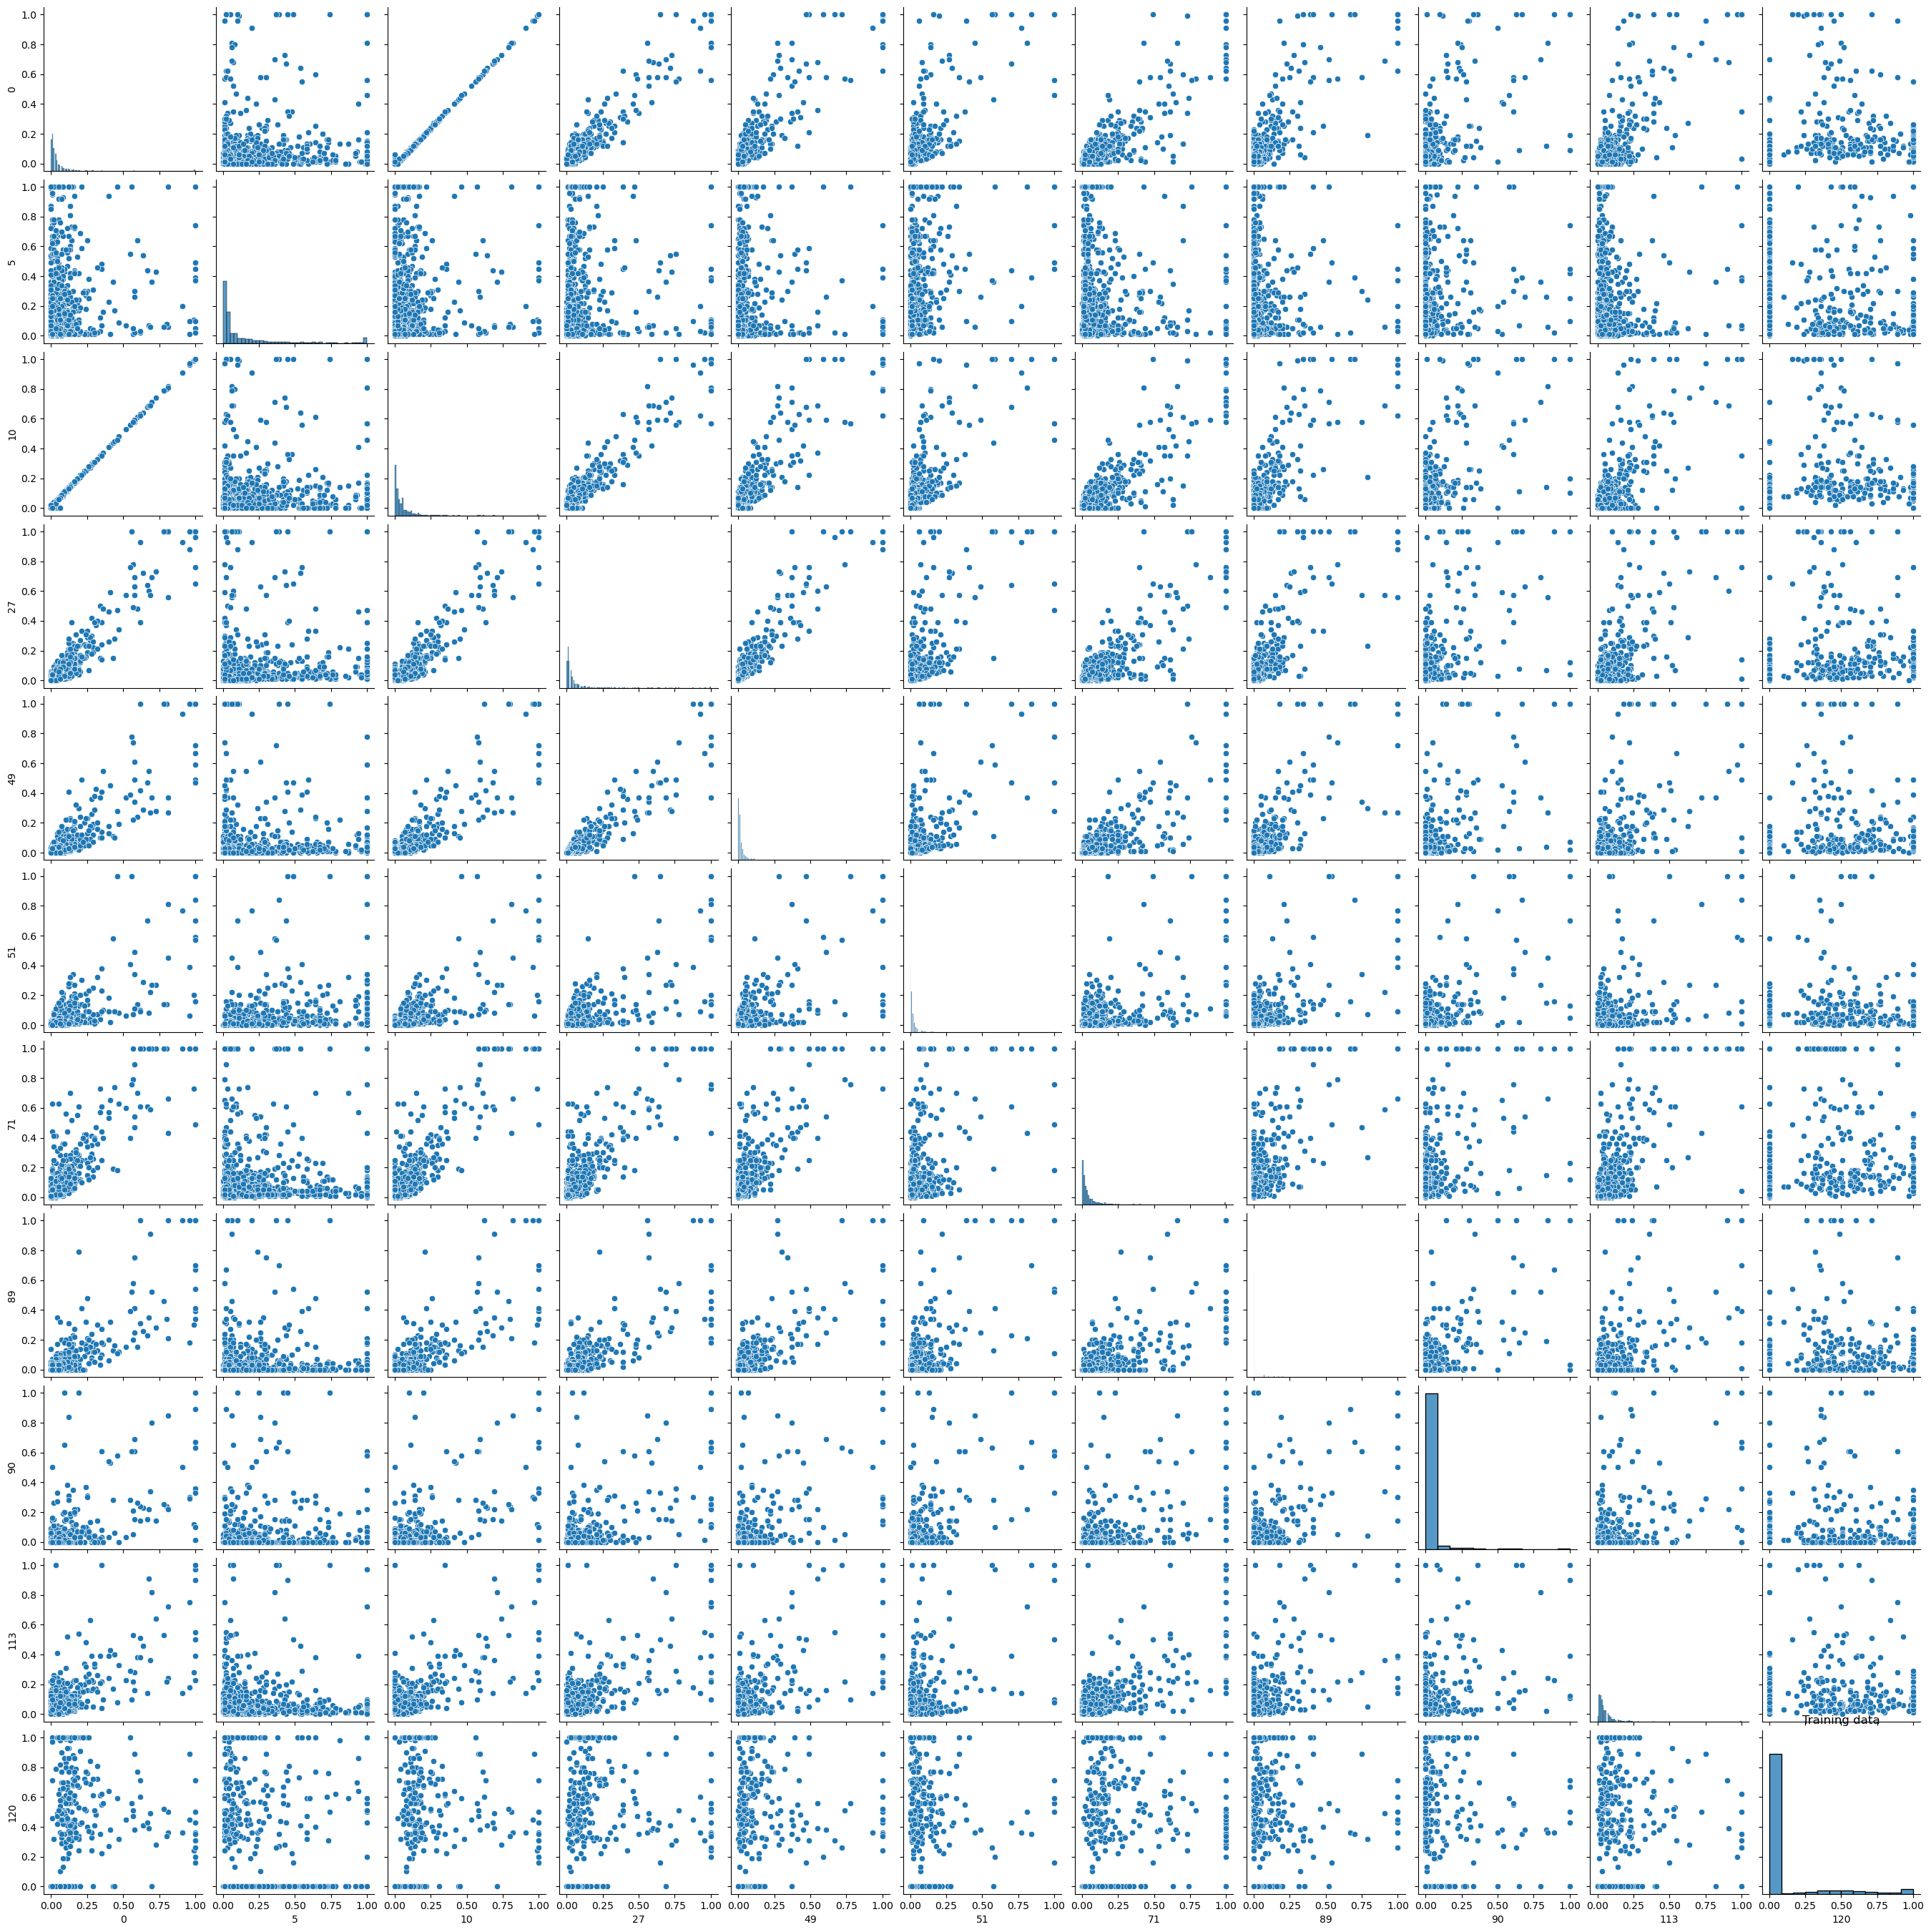

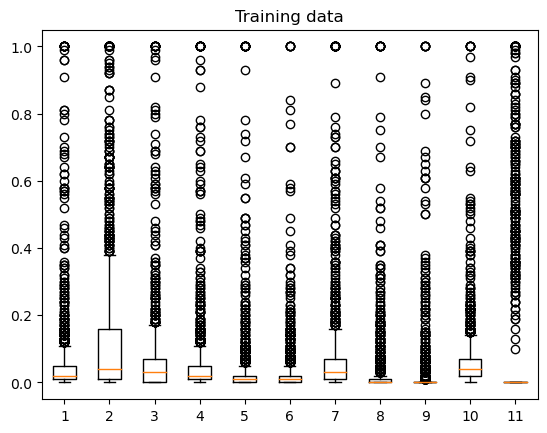

<Figure size 640x480 with 0 Axes>

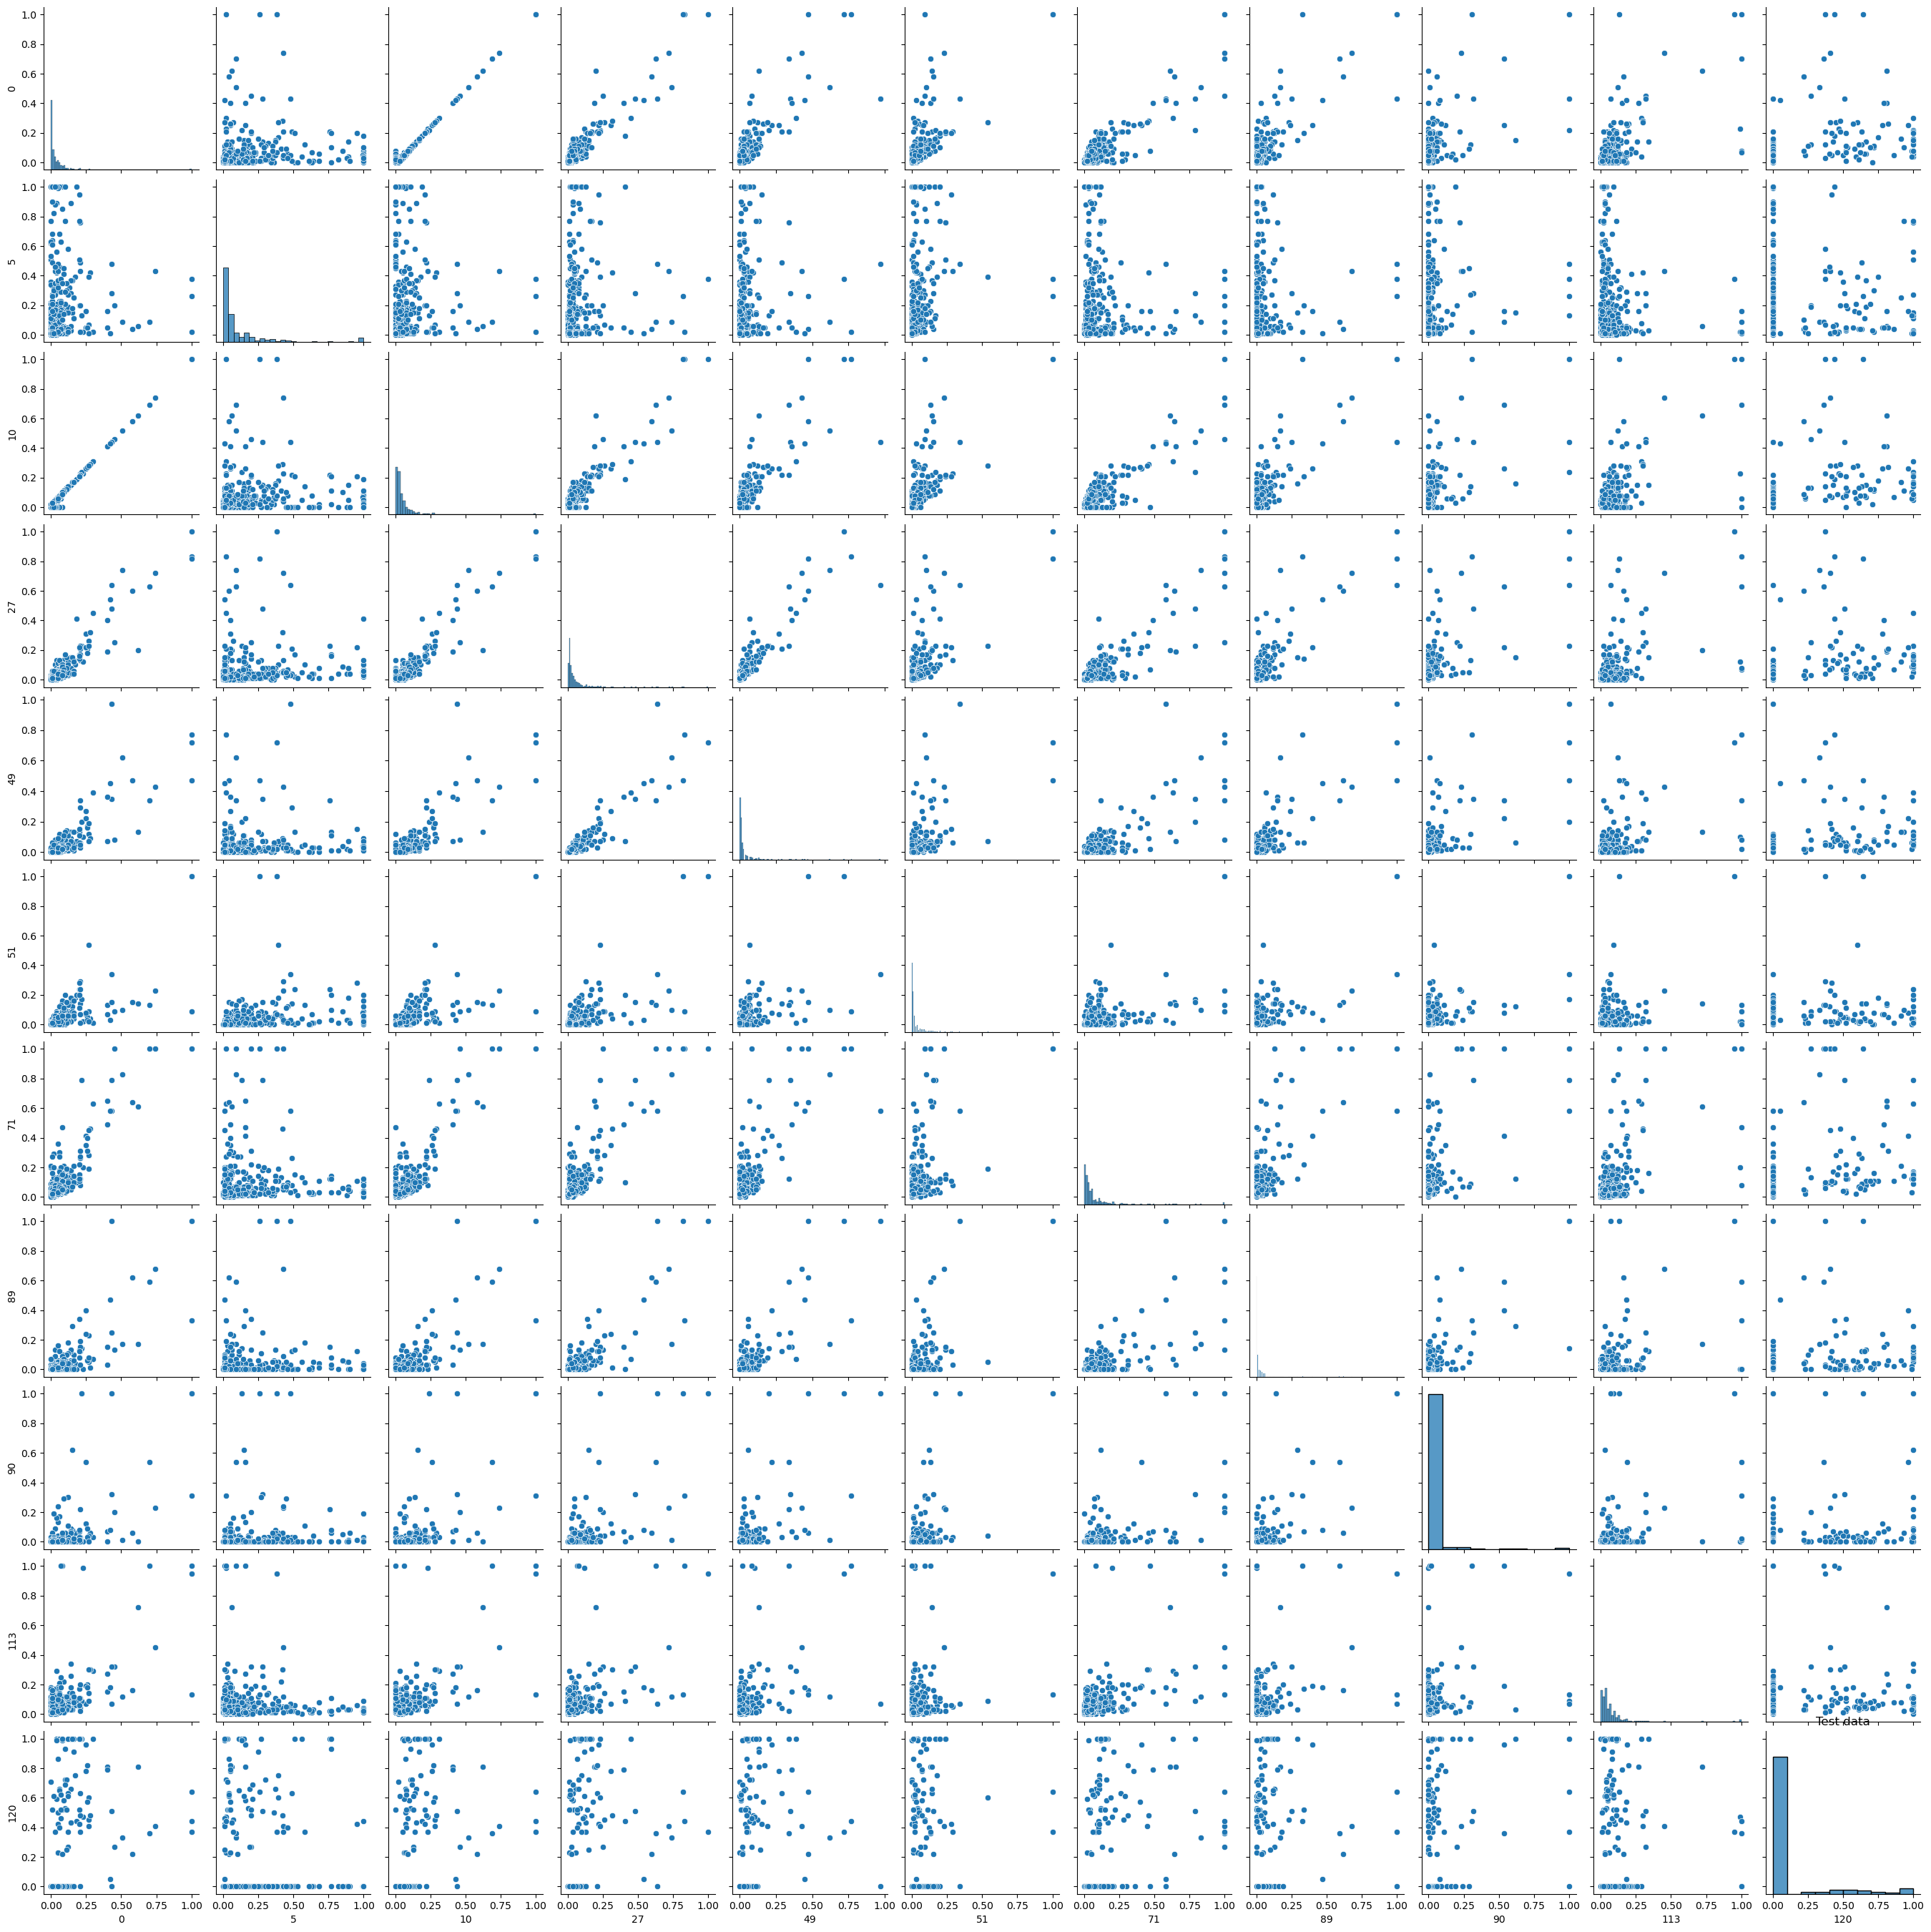

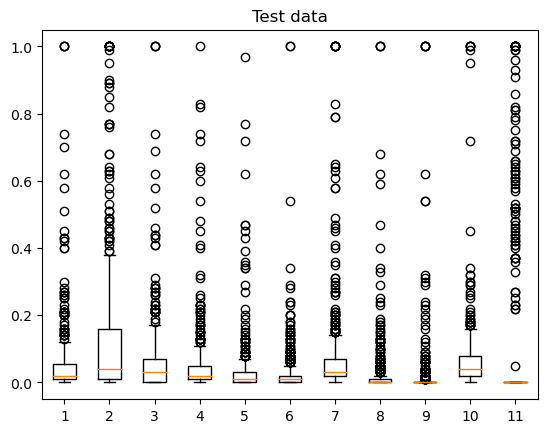

Scatter plots tell us the relationship between each predictors and we are able to see that there is some relationship.


In [10]:
nofeature = np.floor(np.sqrt(128))
hightrain = cv_train.nlargest(nofeature.astype('int'))
hightest = cv_test.nlargest(nofeature.astype('int'))
checkfeature = np.sort(hightrain.index) == np.sort(hightest.index)
print('The highest coefficient of variation between the train and test data sets are the same.')
train11 = train_2b.iloc[:,np.sort(hightrain.index)]
plt.figure()
sns.pairplot(train11)
plt.title('Training data')
plt.show()
plt.figure()
plt.boxplot(train11.iloc[:,0:11])
plt.title('Training data')
plt.show()
test11 = test_2b.iloc[:,np.sort(hightest.index)]
plt.figure()
sns.pairplot(test11)
plt.title('Test data')
plt.show()
plt.figure()
plt.boxplot(test11.iloc[:,0:11])
plt.title('Test data')
plt.show()

print('Scatter plots tell us the relationship between each predictors and we are able to see that there is some relationship.')

### (f) Fit a linear model

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

ytrain = train_2b.iloc[:,122]
xtrain = train_2b.iloc[:,0:122]
ytest = test_2b.iloc[:,122]
xtest = test_2b.iloc[:,0:122]

model_f = LinearRegression()
model_f.fit(xtrain, ytrain)
ypred_f = model_f.predict(xtest)
testerror_f = mean_squared_error(ytest, ypred_f)
print('Test error', testerror_f)

Test error 0.018141971135530115


### (g) Fit a ridge regression model

In [12]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

model_g = Ridge()
alpha_g = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_g = GridSearchCV(model_g, alpha_g, cv=5)
grid_g.fit(xtrain, ytrain)
ypred_g = grid_g.predict(xtest)
testerror_g = mean_squared_error(ytest, ypred_g)
print('Test error', testerror_g)
print('Best alpha', grid_g.best_params_)

Test error 0.01773247499289664
Best alpha {'alpha': 1}


### (h) Fit a LASSO model

In [13]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

norm_h = LassoCV(cv=5, max_iter=4000)
norm_h.fit(xtrain, ytrain)
ypred_norm = norm_h.predict(xtest)
norm_testerr = mean_squared_error(ytest, ypred_norm)
norm_vars = xtrain.columns[norm_h.coef_ != 0]
print('Test error', norm_testerr)
print('Selected variables', norm_vars)

# standardized
scaler = StandardScaler()
xtrain_stand = scaler.fit_transform(xtrain)
xtest_stand = scaler.fit_transform(xtest)
stand_h = LassoCV(cv=5, max_iter=4000)
stand_h.fit(xtrain_stand, ytrain)
ypred_stand = stand_h.predict(xtest_stand)
stand_testerr = mean_squared_error(ytest, ypred_stand)
stand_vars = xtrain.columns[stand_h.coef_ != 0]
print('Standardized test error', stand_testerr)
print('Standardized selected variables', stand_vars)

Test error 0.017758209216319674
Selected variables Int64Index([  2,   4,   6,   7,  11,  13,  14,  15,  16,  17,  18,  21,  22,
             23,  24,  25,  26,  28,  29,  33,  34,  36,  38,  39,  40,  44,
             45,  46,  48,  49,  50,  51,  55,  59,  61,  63,  64,  67,  68,
             69,  70,  71,  72,  74,  75,  76,  77,  78,  79,  82,  85,  86,
             87,  88,  89,  90,  91,  92,  94,  99, 100, 102, 104, 106, 108,
            110, 111, 112, 113, 114, 115, 118, 119, 120, 121],
           dtype='int64')
Standardized test error 0.0179921698303214
Standardized selected variables Int64Index([  2,   4,   6,   7,  11,  13,  14,  15,  16,  17,  18,  21,  22,
             23,  24,  25,  26,  28,  29,  33,  34,  38,  39,  40,  44,  45,
             46,  48,  49,  50,  51,  53,  55,  59,  61,  63,  64,  67,  68,
             69,  71,  72,  74,  75,  76,  77,  78,  82,  85,  86,  87,  88,
             89,  90,  91,  94,  99, 100, 102, 104, 105, 106, 107, 108, 110,
            111

### (i) Fit a PCR model

In [14]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipe = Pipeline([('pca', PCA()), ('lr', LinearRegression())])
param_grid = {'pca__n_components': range(1, xtrain.shape[1]+1)}
pcr_cv = GridSearchCV(pipe, param_grid, cv=5)
pcr_cv.fit(xtrain, ytrain)
pcr_ypred = pcr_cv.predict(xtest)
pcr_testerr = mean_squared_error(ytest, pcr_ypred)
pcr_m = pcr_cv.best_params_['pca__n_components']
print("Test error: ", pcr_testerr)

Test error:  0.018471413390505745


### (j) Fit a boosting tree

In [15]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', alpha=1)
param_grid = {'alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)
grid.fit(xtrain, ytrain)
best_params = grid.best_params_
print('Best hyperparameters:', best_params)
best_model = grid.best_estimator_
y_pred = best_model.predict(xtest)
reg_term = best_model.get_booster().get_score(importance_type='weight')
print('Regularization term:', reg_term)

Best hyperparameters: {'alpha': 1}
Regularization term: {'0': 8.0, '1': 12.0, '2': 30.0, '3': 16.0, '4': 10.0, '5': 15.0, '6': 14.0, '7': 14.0, '8': 14.0, '9': 17.0, '10': 6.0, '11': 2.0, '12': 11.0, '13': 8.0, '14': 21.0, '15': 15.0, '16': 8.0, '17': 20.0, '18': 15.0, '19': 2.0, '20': 8.0, '21': 17.0, '22': 20.0, '23': 20.0, '24': 26.0, '25': 20.0, '26': 18.0, '27': 6.0, '28': 8.0, '29': 12.0, '30': 6.0, '31': 5.0, '32': 24.0, '33': 14.0, '34': 18.0, '35': 12.0, '36': 20.0, '37': 7.0, '38': 23.0, '39': 16.0, '40': 15.0, '41': 16.0, '42': 10.0, '43': 12.0, '44': 21.0, '45': 11.0, '46': 10.0, '47': 25.0, '48': 19.0, '49': 8.0, '50': 19.0, '51': 3.0, '52': 16.0, '53': 16.0, '54': 23.0, '55': 20.0, '56': 6.0, '57': 4.0, '58': 4.0, '59': 9.0, '60': 13.0, '61': 8.0, '62': 13.0, '63': 10.0, '64': 4.0, '65': 12.0, '66': 18.0, '67': 10.0, '68': 18.0, '69': 14.0, '71': 18.0, '72': 22.0, '73': 7.0, '74': 19.0, '75': 30.0, '76': 21.0, '77': 10.0, '78': 13.0, '79': 8.0, '80': 7.0, '81': 12.0, '82'